# Esercitazione 4

- **1.** Verificare il sistema dei numeri di macchina gestito da Python: importare il pacchetto sys. La funzione sys.float_info dà le informazioni necessarie. Stamparle e poi verificarne la validità con le formule viste a lezione: numero minimo di macchina, numero massimo di macchina, precisione di macchina 


  **N.B.** Bisogna tenere presente che c'è l'hidden bit. Quindi la mantissa più piccola da considerare $M=1.m$ dove $m=0$. Quindi il numero minimo ha mantissa $1.0$ e parte esponente $\beta^L$, quindi e' dato da $1.0 \beta^L= \beta^L$.
  
   Ragionate voi per calcolare il numero massimo di macchina, tenendo conto dell'hidden bit.


In [1]:
import numpy as np

In [2]:
import sys
print(sys.float_info)
beta=2.0
t=52
L=-1022.0
U=1023.0
numero_minimo=beta**(L)
print('Numero minimo ', numero_minimo)
numero_massimo=beta**(U)*(1+(1-beta**(-t)))
print ("numero_massimo ",numero_massimo)


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)
Numero minimo  2.2250738585072014e-308
numero_massimo  1.7976931348623157e+308


- **2.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [3]:
p=52
t=53
spacing=beta**(p+1-t)
print("Spacing ",spacing)
x=2.0**52     
y=x+spacing #Numero di macchina successivo a 2**52        
print("x=",x, "y=",y)
z= x+0.5  #Somma ad x (numero pari),  un numero inferiore allo spacing in 2**52,  z risulta uguale ad x
q=y+0.5  #Somma ad y (numero pari),  un numero inferiore allo spacing in 2**52, per il rounding to even z risulta uguale ad y+1
print("z=",z,"q=",q)


Spacing  1.0
x= 4503599627370496.0 y= 4503599627370497.0
z= 4503599627370496.0 q= 4503599627370498.0


- **3** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [4]:
L=-1022
U=1023
t=53
beta=2
# la caridnalità dell'insieme dei numeri finiti di Python è $2 \cdot \beta(\beta^{t-1} (U-L+1) +1$
cardin=2*(beta-1)*beta**(t-1)*(U-L+1)+1
print("cardinalita'  dell'insieme dei numei finiti in Python {:10e}".format(cardin))

cardinalita'  dell'insieme dei numei finiti in Python 1.842873e+19


- **4**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. Si consiglia di
visualizzare i risultati per differenza.


In [5]:
p=0 
t=53

f=2**p  #numero floating point
s=2**(p+1-t) #spacing sul segmento [2^p, 2^(p+1)]=[1,2]
print("Spacing in [1,2]",s)
#..............................................
f1=f+s;     #numero floating point successivo a f
f2=f+s/2;   #risulta f
print("f+s=",f1)
print("f+s/2=",f2)

print(" risultati per differenza f+s-f=", f1-f,"f+s/2-f=",f2-f)


Spacing in [1,2] 2.220446049250313e-16
f+s= 1.0000000000000002
f+s/2= 1.0
 risultati per differenza f+s-f= 2.220446049250313e-16 f+s/2-f= 0.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [15]:
a=1.234567890123400e+15  
b=-1.234567890123401e+15
c=0.06
ris1=(a+b)+c
print('(a+b)+c=',ris1)
ris2=(a+c)+b
print('(a+c)+b=',ris2)
ris3=a+(b+c)
print('a+(b+c)=',ris2)
#Da questo esprimento di trova che non vale la proprietà associativa tra i numeri di macchina.
#Calcoliamo lo spacing del sottointervallo dell'asse reale a cui appartiengono a e b
s=np.spacing(a)
print("spacing ",s)
#Poichè lo spacing è 0.25 quando ad a (oppure b) andiamo a sommare c=0.06, (più piccolo dello spacing), si verifica il fenomeno
# e quindi di assorbimento (fl(a+c)=fl(a) e fl(b+c)=b

(a+b)+c= -0.94
(a+c)+b= -1.0
a+(b+c)= -1.0
spacing  0.25


In [18]:
a=0.23371258e-4
b=0.33678429e+2
c=-0.33677911e+2
ris1=(a+b)+c
print('(a+b)+c=',ris1)
ris2=(a+c)+b
print('(a+c)+b=',ris2)
ris3=a+(b+c)
print('a+(b+c)=',ris2)
print("a",a,"b=",b,"a+c",a+b)
print("Spacing di b", np.spacing(b))

(a+b)+c= 0.0005413712580022434
(a+c)+b= 0.0005413712580022434
a+(b+c)= 0.0005413712580022434
a 2.3371258e-05 b= 33.678429 a+c 33.678452371258004
Spacing di b 7.105427357601002e-15


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [8]:
import math

#In aritmetica esatta, y1 e y2 sono equivalenti, ossia
#y1=sqrt(x^2+1)-x=(sqrt(x^2+1)-x)*(sqrt(x^2+1)+x)/(sqrt(x^2+1)+x)=1/(sqrt(x^2+1)+x)=y2

y1=lambda x: math.sqrt(x**2+1)-x
y2= lambda x: 1/(math.sqrt(x**2+1)+x)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#in questo primo esempio y1 e y2 danno lo stesso risultato perchè 
#sqrt(x^2+1) è una "buona approssimazione" della radice quadrata, e quindi y1 non è affetto da cancellazione numerica
x=7777;
print("x^2, x^2+1=  sqrt(x^2+1)",x**2, x**2+1,math.sqrt(x**2+1))
print("x=",x,"y1(x)=",y1(x),"y2(x)=",y2(x))
print("Spacing in x**2 = ",x**2," dato da ",np.spacing(x**2))
err=abs((y1(x)-y2(x))/y2(x))
print("errore relativo caso 1 ",err)
print("-----------------------------------------")
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

x=77777777

print("x^2, x^2+1=  sqrt(x^2+1)",x**2, x**2+1,math.sqrt(x**2+1))
# Esempio di cancellazione numerica in y1:
print("Spacing in  x**2=",x**2," dato da ",np.spacing(x**2))
print("x=",x,"y1(x)=",y1(x),"y2(x)=",y2(x))
#La cancellazione di cifre significative è dovuta all'estrazione della radice quadrata
err=abs((y1(x)-y2(x))/y2(x))
print("errore relativo caso 2 ",err)

x^2, x^2+1=  sqrt(x^2+1) 60481729 60481730 7777.000064292143
x= 7777 y1(x)= 6.429214317904552e-05 y2(x)= 6.429214323431402e-05
Spacing in x**2 =  60481729  dato da  7.450580596923828e-09
errore relativo caso 1  8.59646147292077e-10
-----------------------------------------
x^2, x^2+1=  sqrt(x^2+1) 6049382595061729 6049382595061730 77777777.0
Spacing in  x**2= 6049382595061729  dato da  1.0
x= 77777777 y1(x)= 0.0 y2(x)= 6.428571492857143e-09
errore relativo caso 2  1.0


- **7.** Valutare in aritmetica floating point l'espressione
$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$
B(x)=\frac{1}{x (x+1)}.
$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

'''
Utilizziamo il modulo numpy perche' lavorare con in numpy array ci permette di eseguire le operazioni su interi numpy array senza 
sviluppare i cicli
'''

#L'istruzione seguente calcola il numpy array [1,1e+1,1e+2,....,1e+20]
x=10.0**np.arange(21)    #utilizzo 10.0 per avere un numpy array x con dtype float.

#Valutiamo le espressioni A(x) e B(x) su tutto il numpay array x. Notare che A(x) e B(x) sono algebricamente equivalenti.

Ax=1/x-1/(x+1);
Bx=1/(x*(x+1));

#Calcoliamo sperimentalmente l'errore relativo di fl(A(x)) rispetto alla formula esatta B(x)
Erelx=np.abs(Ax-Bx)/np.abs(Bx)
# Calcoliamo lo spacing per ogni componennte del vettore x
print("x=",x)
print("spacing ",np.spacing(x))
print("Errore relativo ",Erelx)
#Notiamo che a partire da x= 1.e+16, lo spacing è maggiore di 1, quindi nella formula A(x)=1/x-1/(x+1), il valore 1/(x+1) 
#viene approssimato ad (1/x), quindi A(x) vale zero, e quindi, a partire da x=1.e+16, l'errore relativo rispetto al
# valore esatto dato da B(x) risulta #1 cioè pari al 100%)

x= [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
spacing  [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
Errore relativo  [0.00000000e+00 3.81639165e-16 8.21283146e-16 2.16209395e-14
 6.38647291e-14 6.25044601e-13 1.07548935e-10 9.28145750e-10
 1.03187712e-08 1.50211282e-07 6.14600376e-07 3.17244773e-08
 4.84358805e-05 9.06716545e-04 6.03525942e-03 1.39238685e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


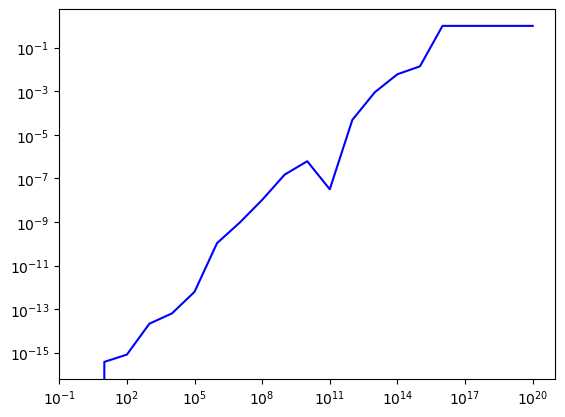

In [10]:
plt.loglog(x,Erelx,'b-')

- **8-**  Quali problemi si possono incontrare nel calcolo delle radici di $a x^2+b x+c$? Provare a risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). Che cosa si osserva?

(8,)
[-1.01020514e-01 -1.00010002e-02 -1.00000100e-03 -1.00000001e-04
 -1.00000034e-05 -1.00000761e-06 -9.96515155e-08 -7.45058060e-09]
[1.02051443e-02 1.00020005e-04 1.00002262e-06 1.11176633e-08
 3.38535756e-07 7.61449337e-06 3.48484516e-03 2.54941940e-01]
[1.02051443e-02 1.00020005e-04 1.00000200e-06 1.00000002e-08
 1.00000202e-10 1.00013415e-12 1.00585162e-14 0.00000000e+00]
spacing per b**2  [1.42108547e-14 1.81898940e-12 1.16415322e-10 1.49011612e-08
 1.90734863e-06 1.22070312e-04 1.56250000e-02 2.00000000e+00]
-b -1.0000000000000000e+01  b**2-> 1.0000000000000000e+02  b**2-4*a*c -> 9.6000000000000000e+01  sqrt(b**2-4*a*c) -> 9.7979589711327115e+00
-b -1.0000000000000000e+02  b**2-> 1.0000000000000000e+04  b**2-4*a*c -> 9.9960000000000000e+03  sqrt(b**2-4*a*c) -> 9.9979997999599902e+01
-b -1.0000000000000000e+03  b**2-> 1.0000000000000000e+06  b**2-4*a*c -> 9.9999600000000000e+05  sqrt(b**2-4*a*c) -> 9.9999799999799995e+02
-b -1.0000000000000000e+04  b**2-> 1.0000000000000000e+08

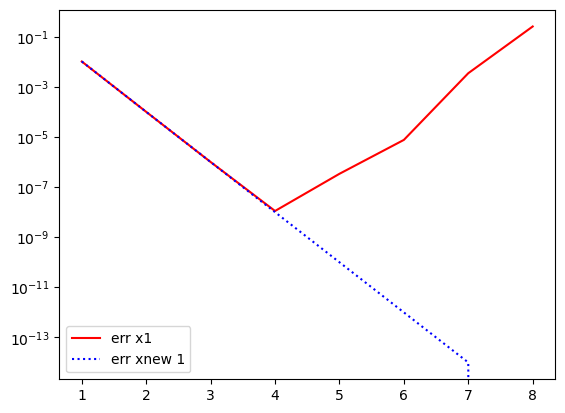

In [23]:
a=1
c=1
import numpy as np
import matplotlib.pyplot as plt
k=np.arange(1,9)
b=10.0**k;
print(b.shape)
Delta= b**2-4*a*c
'''
La formula del calcolo della soluzione x1 può dare problemi numerici in base ai valori di b:
quando b assume un valore molto elevato b**2-4ac è approssimabile a b**2, quindi nel calcolo
di x1 si può veriificare il fenomento di cancellazione dovuto al calcolo -b+ sqrt(Delta)
in quanto sqrt(Delta) in questo caso è approssimabile a b.
Per la formula del calcolo della soluzione x2 questo problema non si verifica.
'''
x1=(-b+np.sqrt(Delta))/(2*a)
x2=(-b-np.sqrt(Delta))/(2*a)
print(x1)
'''
Usiamo una formula alternativa, nota in algebra, per cui il prodotto delle due radici dell'equazione di secondo grado è x1*x2=c/a
per il calcolo della soluzione x1 a partire dalla soluzione x2, quindi x1=(c/a)*1/x2=c/(a*x2)
'''
x1new=c/(a*x2)
#La soluzione esatta dell'equazione è:
x1vera=-10.0**(-k)  #N.B. questa è la soluzione esatta per k grandi, altrimenti è un approssimazione.
#Calcolo dell'errore relativo per il calcolo della soluzione x1
err=np.abs(x1vera-x1)/np.abs(x1vera)
print(err)
#Calcolo dell'errore relativo per il calcolo della soluzione x1 con la formula alternativa
errnew=np.abs(x1vera-x1new)/np.abs(x1vera)
print(errnew)
print("spacing per b**2 ",np.spacing(b**2))

for i in range(b.shape[0]):
   print("-b {:.16e}  b**2-> {:.16e}  b**2-4*a*c -> {:.16e}  sqrt(b**2-4*a*c) -> {:.16e}".format(-b[i],b[i]**2,b[i]**2-4*a*c,np.sqrt(b[i]**2-4*a*c )))
 
#Si nota che sottraiamo a b**2 una quantità più piccola dello spacing del sottointervallo dell'asse reale a cui b**2 appartiene 
#(infatti 4ac=4 e 4 è maggiore dello spacing per tutti i valori di b**2 considerati). La crescita dell'errore non è dovuto quindi al fenomeno dell'assorbimento.
#L'errore viene propagato dall'estrazione della radice, all'aumentare del radicando.
#Vengono confrontati gli errori relativi, rispetto alla soluzione vera, sia di x1, ottenuta utilizzando la formula risolutiva x1=(-b+np.sqrt(Delta))/(2*a)
# che di x1new=c/(a*x2). Si nota che le due formule producono risultati con lo stesso errore relativo rispetto alla soluzione vera, per valori di k fino a 4. 
#Al crescere di k e quindi del radicando aumenta l'errore di approssimazione della radice quadrata e quindi aumenta l'errore relativo di x1, se confrontato 
#con l'errore relativo di x1new.
#Una nota: la soluzione x1vera=-10.0**(-k)  è la soluzione esatta dell'equazione per k grandi, altrimenti è un approssimazione. Ecco perchè nel grafico l'errore relativo
#commesso calcolando x1new decresce all'aumentare di k.

plt.plot(k,err,'r-',k,errnew,'b:')
plt.yscale('log')
plt.legend(["err x1", "err xnew 1"])

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

Spacing in [1,2]  2.220446049250313e-16
Valori di 1/n  [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16]


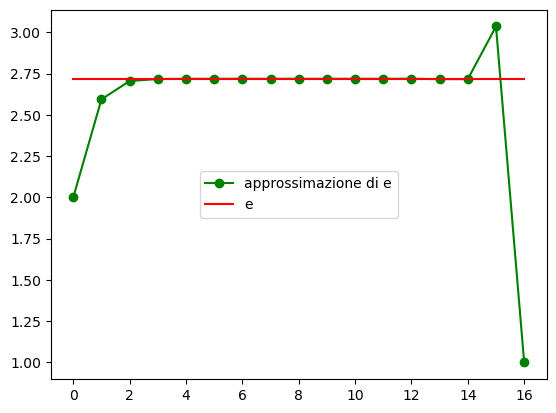

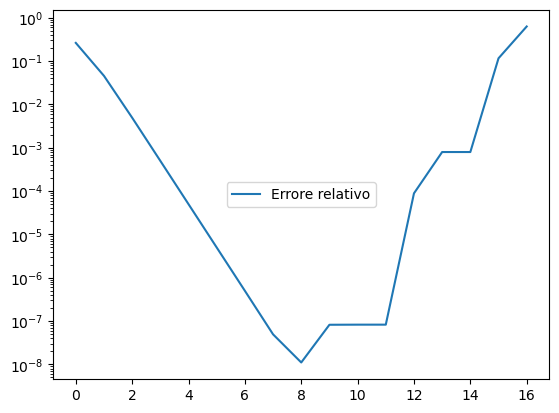

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
#Approx di e=lim(1/n+1)^n, n->+infinito
e=math.exp(1) #Valore esatto

k1=np.arange(17)
n=10.0**k1
eapp1= (1+1/n)**n
err_rel=np.abs(e-eapp1)/e

print("Spacing in [1,2] ",np.spacing(1))
#Lo spacing in [1,2] è 2.
print("Valori di 1/n ",1/n)
#Si nota che quando n=10**16, 1/n=1e-16  risulta più piccolo dello spacing in [1,2], per cui (1+1/n) 
# vale ad 1, ed il valore approssimato di "e" vale 1.
#L'errore relativo cala per valori di k1 da 0 a 8 e quindi di n da 10**0 fino a 10**8.
#Per  valori di n maggiori di 10**8,  nella formula (1+1/n) si cominciano a verificare gli errori 
#dovuti al fatto che si sommano valori di ordine di grandezza molto diversi, 1 ed 1/n molto piccolo al crescere di n. 
#Quando n=10**16, (1+1/n) vale 1 poichè 1/n è più piccolo dello spacing in [1,2] #e quindi il valore approssimato di "e" vale 1.

plt.plot(k1 ,eapp1,'go-',k1,e*np.ones((17,1)),'r-')
plt.legend(['approssimazione di e','e'],loc='center')  #La proprietà loc, serve per specificare la posizione della legend
plt.show()

plt.plot(k1,err_rel)
plt.yscale('log')
plt.legend(["Errore relativo"],loc='center')
plt.show()

